In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Empezamos cargando los datasets y visualizando los primeros valores.

In [2]:
productos = pd.read_csv('./productos.csv')
categorias = pd.read_csv('./categorias.csv')
clientes = pd.read_csv('./clientes.csv')
ventas = pd.read_csv('./ventas.csv')

In [4]:
productos.head()

,id_producto,nombre,precio,stock,id_categoria
0,10119,Kuromi Y2K Top,14.99,2,2035
1,10198,Hello Kitty Pajamas,25.99,1,2035
2,15218,Dark mini skirt,15.65,3,2033
3,15219,Black Leather Jacket,85.99,4,2033
4,15220,Dark Velvet Choker,12.99,10,2033


In [5]:
categorias.head()

,id_categoria,nombre_categoria
0,2033,Gothic
1,2034,Y2K
2,2035,Sanrio
3,2036,Girly
4,2037,Cosplay


In [6]:
clientes.head()

,id_cliente,nombre,email,direccion,telefono,provincia
0,1,Kim Hajun,kimkim98@hotmail.com,Park Avenue 1178,82296745122,NaN
1,2,Lopez Andrea,andylp00@gmail.com,Av. Congreso 2011,541188765234,Buenos Aires
2,3,Garcia Juan,juangarcia12@gmail.com,Calle Corrientes 1234,541134567890,Buenos Aires
3,4,Martinez Sofia,sofiamartinez23@gmail.com,Calle San Martin 456,541198765432,Buenos Aires
4,5,Rodriguez Carlos,carlosr123@gmail.com,Av. Libertador 6543,541144567890,Buenos Aires


In [7]:
ventas.head()

,id_venta,fecha,email,provincia,id_categoria,total,id_producto
0,1,2024-01-21,victoriagarcia@gmail.com,San Lius,2033,12.99,15220
1,2,2024-02-15,alejandromartinez@gmail.com,San Luis,2037,95.60,28958
2,3,2024-06-18,fedsilva@gmail.com,Buenos Aires,2035,14.99,10119
3,4,2024-03-19,sofiamartinez23@gmail.com,Buenos Aires,2035,25.99,10198
4,5,2024-02-10,juangarcia12@gmail.com,Buenos Aires,2037,126.99,28989


In [8]:
clientes = clientes.dropna()

In [9]:
clientes.head()

,id_cliente,nombre,email,direccion,telefono,provincia
1,2,Lopez Andrea,andylp00@gmail.com,Av. Congreso 2011,541188765234,Buenos Aires
2,3,Garcia Juan,juangarcia12@gmail.com,Calle Corrientes 1234,541134567890,Buenos Aires
3,4,Martinez Sofia,sofiamartinez23@gmail.com,Calle San Martin 456,541198765432,Buenos Aires
4,5,Rodriguez Carlos,carlosr123@gmail.com,Av. Libertador 6543,541144567890,Buenos Aires
5,6,Perez Camila,camiperez89@gmail.com,Calle Lavalle 987,541199876543,Buenos Aires


Continuamos con la visualización de duplicados y outliers.

In [10]:
print(ventas.isnull().sum())

id_venta        0
fecha           0
email           0
provincia       0
id_categoria    0
total           0
id_producto     0
dtype: int64


In [11]:
print(clientes.isnull().sum())


id_cliente    0
nombre        0
email         0
direccion     0
telefono      0
provincia     0
dtype: int64


In [12]:
print(productos.isnull().sum())

id_producto     0
nombre          0
precio          0
stock           0
id_categoria    0
dtype: int64


In [13]:
print(productos.isnull().sum())

id_producto     0
nombre          0
precio          0
stock           0
id_categoria    0
dtype: int64


In [14]:

print(categorias.isnull().sum())

id_categoria        0
nombre_categoria    0
dtype: int64


In [15]:
print(ventas.duplicated().sum())


0


In [16]:
print(clientes.duplicated().sum())

0


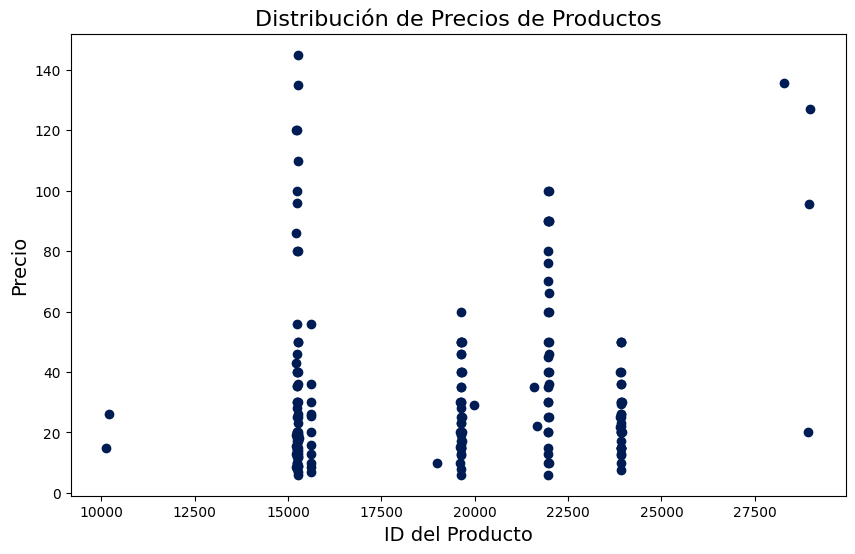

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(productos['id_producto'], productos['precio'], color='#001c55')
plt.title('Distribución de Precios de Productos', fontsize=16)
plt.xlabel('ID del Producto', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.show()

In [51]:
Q1 = productos['precio'].quantile(0.25)
Q3 = productos['precio'].quantile(0.75)
IQR = Q3 - Q1

In [52]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [53]:
outliers = productos[(productos['precio'] < limite_inferior) | (productos['precio'] > limite_superior)]

In [54]:
print("Outliers detectados:", outliers)

Outliers detectados:      id_producto                           nombre  precio  stock  id_categoria
3          15219             Black Leather Jacket   85.99      4          2033
7          15223               Black Combat Boots  120.00      2          2033
16         15232            Victorian Style Dress   95.99      2          2033
23         15239                Black Velvet Cape   99.99      2          2033
28         15244           Bat Embroidered Jacket  120.00      4          2033
35         15251                 Dark Angel Wings   79.99      2          2033
39         15255              Gothic Lolita Dress  109.99      2          2033
40         15256             Spiked Leather Boots  135.00      4          2033
55         15271          Gothic Thigh-High Boots  145.00      3          2033
57         15273            Gothic Leather Corset   79.99      2          2033
116        21956              Sailor Moon Costume   89.99      3          2037
123        21963              F

Acá podemos ver que hay una cantidad considerable de outliers en los precios. 

In [58]:
print("Estadísticas descriptivas de los outliers:", outliers['precio'].describe)

Estadísticas descriptivas de los outliers: <bound method NDFrame.describe of 3       85.99
7      120.00
16      95.99
23      99.99
28     120.00
35      79.99
39     109.99
40     135.00
55     145.00
57      79.99
116     89.99
123     89.99
124     99.99
126     79.99
136     89.99
143     99.99
144     89.99
176    135.65
178     95.60
179    126.99
Name: precio, dtype: float64>


In [60]:
print("Estadísticas descriptivas del conjunto de datos original:", productos['precio'].describe)

Estadísticas descriptivas del conjunto de datos original: <bound method NDFrame.describe of 0       14.99
1       25.99
2       15.65
3       85.99
4       12.99
        ...  
175     29.99
176    135.65
177     20.00
178     95.60
179    126.99
Name: precio, Length: 180, dtype: float64>


Text(0, 0.5, 'Frecuencia')

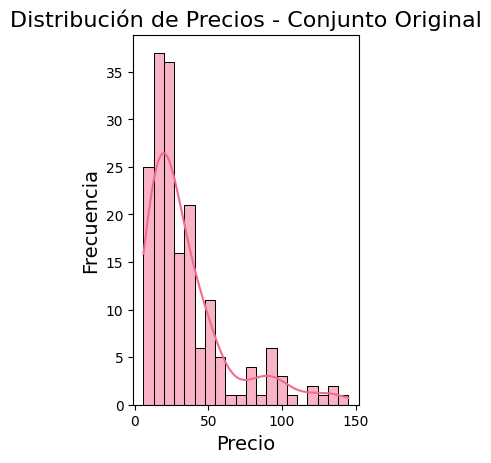

In [65]:
plt.subplot(1, 2, 1)
sns.histplot(productos['precio'], bins=20, kde=True, color='#f26a8d')
plt.title('Distribución de Precios - Conjunto Original', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

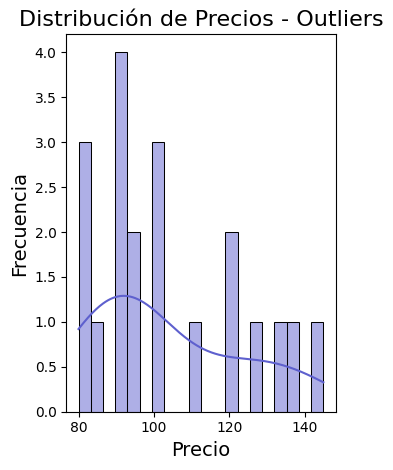

In [61]:
plt.subplot(1, 2, 2)
sns.histplot(outliers['precio'], bins=20, kde=True, color='#5e60ce')
plt.title('Distribución de Precios - Outliers', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.tight_layout()
plt.show()

Empezamos a abordar la problemática de las ventas, comenzando por visualizar los meses con más ventas. Seguimos con las categorías con más ventas y por último las provincias con más ventas.
Para poder hacer esto, convertimos la columna fecha a datetime, creamos la columna de mes y año y agrupamos las ventas por mes. 

In [17]:
ventas['fecha'] = pd.to_datetime(ventas['fecha'])

In [18]:
ventas['mes'] = ventas['fecha'].dt.to_period('M')

In [19]:
ventas_mensuales = ventas.groupby('mes')['total'].sum().reset_index()

In [20]:
ventas_mensuales['mes'] = ventas_mensuales['mes'].astype(str)

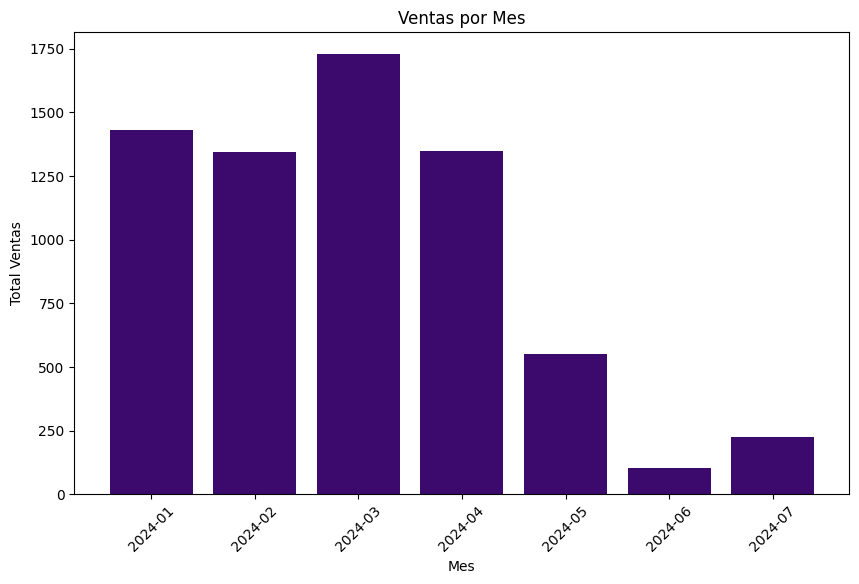

In [21]:
plt.figure(figsize=(10,6))
plt.bar(ventas_mensuales['mes'], ventas_mensuales['total'], color='#3c096c')
plt.xticks(rotation=45)
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Total Ventas')
plt.show()

Podemos ver que el mes con mayor ventas fue marzo, seguido de enero y por último febrero. Junio se podría considerar un mes crítico para el emprendimiento, con una leve subida de ventas en julio.

In [22]:
ventas_categoria = ventas.groupby('id_categoria')['total'].sum().reset_index()

In [23]:
ventas_categoria = ventas_categoria.sort_values(by='total', ascending=False)

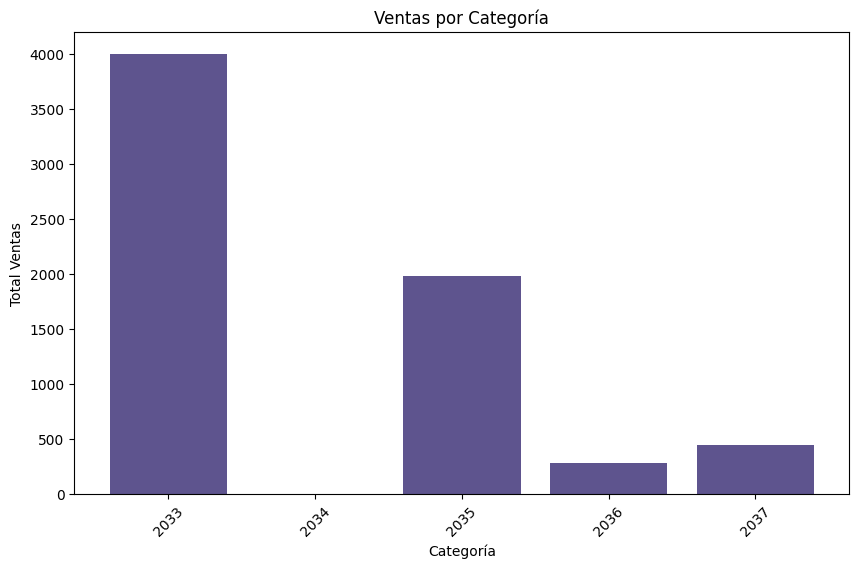

In [24]:
plt.figure(figsize=(10,6))
plt.bar(ventas_categoria['id_categoria'], ventas_categoria['total'], color='#5e548e')
plt.xticks(rotation=45)
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Total Ventas')
plt.show()

Acá vemos que la categoría que más vende, es la 2033. Que, viendo nuestro diccionario de datos, es la categoría de 'Gothic'. La categoría 2034, 'Y2k', no tiene ventas. 

In [25]:
ventas_provincia = ventas.groupby('provincia')['total'].sum().reset_index()

In [26]:
ventas_provincia = ventas_provincia.sort_values(by='total', ascending=False)

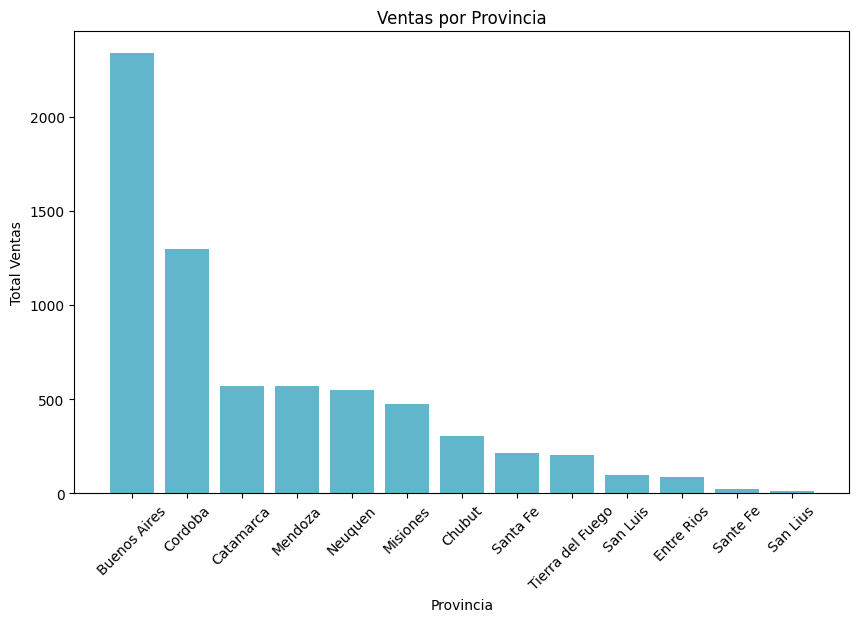

In [27]:
plt.figure(figsize=(10,6))
plt.bar(ventas_provincia['provincia'], ventas_provincia['total'], color='#62b6cb')
plt.xticks(rotation=45) 
plt.title('Ventas por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Total Ventas')
plt.show()

Acá vemos que Buenos Aires lidera el gráfico, siendo la provincia donde más se compra. Seguida de Córdoba. Catamarca, Mendoza, Neuquén y Misiones se ven bastante parejas. Y San Luis y Santa Fé, están por debajo de todas las demás.

In [28]:
ventas['trimestre'] = ventas['fecha'].dt.to_period('Q')

In [29]:
ventas_trimestre = ventas.groupby('trimestre')['total'].sum()

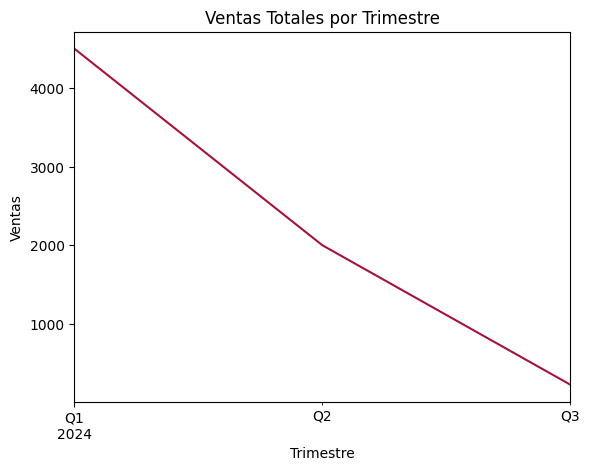

In [30]:
ventas_trimestre.plot(kind='line', title='Ventas Totales por Trimestre', color= '#a4133c')
plt.ylabel('Ventas')
plt.xlabel('Trimestre')
plt.show()

Con este gráfico de linea, podemos ver como caen las ventas con el paso de los trimestres.

Visualizamos un top 10 de productos más vendidos:

In [31]:
ventas_producto = ventas.groupby('id_producto')['total'].sum().sort_values(ascending=False)

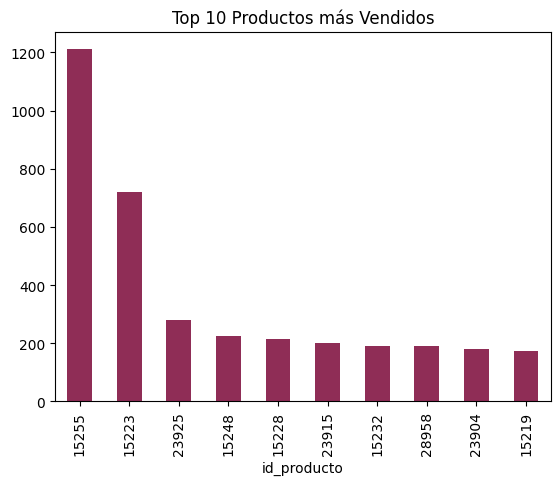

In [32]:
ventas_producto.head(10).plot(kind='bar', title='Top 10 Productos más Vendidos', color= '#8f2d56')
plt.show()

Acá podemos ver que los productos más vendidos, son el 15255 y el 15223. 

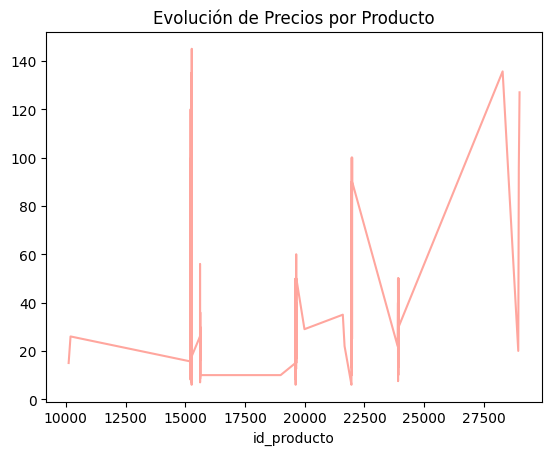

In [33]:
productos.groupby('id_producto')['precio'].mean().plot(kind='line', title='Evolución de Precios por Producto', color= '#ffa69e')
plt.show()

Analizando los precios de cada producto, podemos ver que son bastante inestables. 

Ahora, analicemos el comportamiento de los clientes de Noir. Empezando por la cantidad de clientes perdidos. Siguiendo por la frecuencia de compra de los clientes.

In [34]:
ventas['trimestre'] = ventas['fecha'].dt.to_period('Q')

In [35]:
clientes_por_trimestre = ventas.groupby(['email', 'trimestre']).size().unstack(fill_value=0)

In [36]:
clientes_perdidos = clientes_por_trimestre[(clientes_por_trimestre.iloc[:, 0] > 0) & (clientes_por_trimestre.iloc[:, -1] == 0) & (clientes_por_trimestre.iloc[:, -2] == 0)]
print(f"Clientes perdidos: {len(clientes_perdidos)}")

Clientes perdidos: 71


In [37]:
compras_por_cliente = ventas.groupby('email')['id_venta'].count().reset_index()

In [38]:
compras_por_cliente.columns = ['email', 'num_compras']

In [39]:
clientes_recurrentes = compras_por_cliente[compras_por_cliente['num_compras'] > 1]

In [40]:
num_clientes_recurrentes = len(clientes_recurrentes)
print(f"Número de clientes que volvieron a comprar: {num_clientes_recurrentes}")

Número de clientes que volvieron a comprar: 32


In [41]:
total_clientes = len(compras_por_cliente)

In [42]:
porcentaje_recurrentes = (num_clientes_recurrentes / total_clientes) * 100
print(f"Porcentaje de clientes que volvieron a comprar: {porcentaje_recurrentes:.2f}%")

Porcentaje de clientes que volvieron a comprar: 25.60%


Vemos que Noir perdió un total de 71 clientes, y 32 volvieron a comprar, siendo tan solo un 25.60%. Esto muestra una baja retención de clientes. Para solucionar esto, sería bueno implementar algún programa de lealtad, como una cuponera de descuentos, por cada compra que el cliente haga, recibe un descuento adicional en la siguiente compra. También se podria implementar una campaña de retargeting, proponer descuentos adicionales para atraer devuelta a los clientes perdidos.

Luego del análisis exploratorio, llegamos a la conclusión de que es posible que la razón de la caída de las ventas sea la insastifacción de los clientes, ya que el porcentaje de clientes que han vuelto a comprar es muy bajo a comparación de los que compraron solo una vez. Noir debería empezar a implementar estrategias de fidelización para no perder tantos clientes. También debería considerar la competencia en el mercado. Hay muchos emprendimientos iguales, que manejan precios más bajos a comparación de Noir, que además maneja precios con rangos muy amplios, de 9 a 200 USD. Lo ideal sería, mantener un buen rango de precios.

A continuación, proponemos un KPI:
- Tasa de retención de clientes.
Su fórmula sería: Clientes al final del período - Nuevos clientes adquiridos durante el período / Clientes al inicio del período * 100.
Esto mide el porcentaje de clientes que permanecen con la empresa durante un período determinado. Una tasa de retención alta indica que los clientes están satisfechos y vuelven a comprar.
- Objetivo: Mantener la tasa de retención por encima del 70% en el próximo trimestre.
- Estrategia: Implementar una campaña de reactivación para clientes perdidos.
Un ejemplo sería: 
- Clientes al inicio: 150
- Clientes al final: 130
- Nuevos clientes: 10
130 - 10 / 150 * 100 = 120 / 150 * 100 = 80%

In [43]:
data_ventas = {
    'Trimestre': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Ventas': [15000, 12000, 9000, 7000] 
}

In [44]:
ventas_trimestre = pd.DataFrame(data_ventas)

In [45]:
data_crr = {
    'Trimestre': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Tasa de Retención (%)': [40, 55, 70, 80] 
}

In [46]:
crr_trimestre = pd.DataFrame(data_crr)

In [47]:
ventas_trimestre = pd.merge(ventas_trimestre, crr_trimestre, on='Trimestre', how='left')

In [48]:
print(ventas_trimestre)

  Trimestre  Ventas  Tasa de Retención (%)
0        Q1   15000                     40
1        Q2   12000                     55
2        Q3    9000                     70
3        Q4    7000                     80


Este es un ejemplo de la implementación del KPI, ahora procedemos a graficarlo.

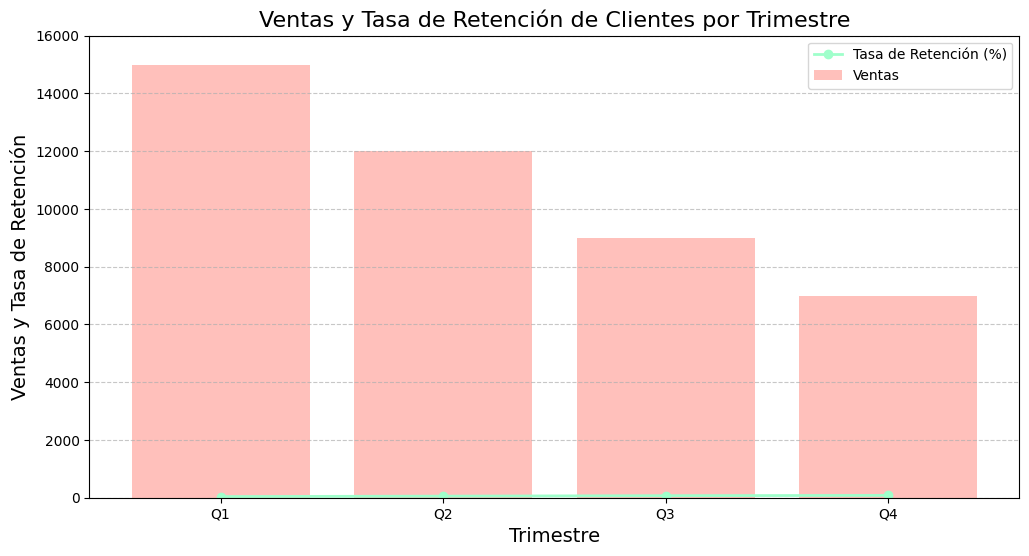

In [49]:
plt.figure(figsize=(12, 6))
plt.bar(ventas_trimestre['Trimestre'], ventas_trimestre['Ventas'], color='#ffa69e', label='Ventas', alpha=0.7)
plt.plot(ventas_trimestre['Trimestre'], ventas_trimestre['Tasa de Retención (%)'], marker='o', color='#9fffcb', linestyle='-', linewidth=2, label='Tasa de Retención (%)')
plt.title('Ventas y Tasa de Retención de Clientes por Trimestre', fontsize=16)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Ventas y Tasa de Retención', fontsize=14)
plt.ylim(0, max(ventas_trimestre['Ventas'].max(), ventas_trimestre['Tasa de Retención (%)'].max()) + 1000) 
plt.xticks(ventas_trimestre['Trimestre'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()